In [1]:
import cv2 as cv
import numpy as np

## Accessing and Modify pixel values 

In [2]:
img = cv.imread('../images/mm.jpg')
img.shape

(422, 597, 3)

In [3]:
def show_cv(name, img):
    cv.imshow(name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [4]:
show_cv('MM', img)

In [5]:
px = img[100, 100]
print(px)

[160 213 226]


In [6]:
# 为某点重新赋值
img[100, 100] = [255, 255, 255]
print(img[100,100])

[255 255 255]


In [7]:
red = img[100,100,2]
red

255

### 通过array.item()和array.itemset()分别获取和重新赋值，速度比索引要快

In [8]:
# 查看G通道某点的像素值
img.item(100, 10, 1)

214

In [9]:
# 修改G通道某点的像素值
img.itemset((100, 10, 1), 255)
img.item(100,10,1)

255

## Accessing Image Properties

In [10]:
# 形状
img.shape

(422, 597, 3)

In [11]:
# 大小（像素点个数）
img.size

755802

In [12]:
422*597*3

755802

In [13]:
# 数据类型
img.dtype

dtype('uint8')

## Image ROI

In [14]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

In [15]:
show_cv('d', img)

In [16]:

# mm_roi = img[400:275, 500:287]
mm_roi = img[275:297, 400:500]
print(mm_roi.shape)
print(img[388:400, 485:585].shape)
img[388:410, 485:585] = mm_roi
show_cv('M', img)

(22, 100, 3)
(12, 100, 3)


## Spliting and Merging Image channels

In [17]:
b, g, r = cv.split(img) # 时间开销大

In [18]:
b = img[:, :, 0] # 常用数组索引获取，速度快，

In [19]:
img = cv.merge((b,g,r))

In [20]:
img[:,:,2] = 0 # 常用数组索引获取，速度快，

In [21]:
show_cv('a', img)

## Making borders for image（Padding）

### cv.copyMakeBorder
- src - input image
- top, bottom, left, right - border width in number of pixels in corresponding directions
- borderType - Flag defining what kind of border to be added. It can be following types:
         cv.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
         cv.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
         cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
         cv.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
         cv.BORDER_WRAP - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg
- value - Color of border if border type is cv.BORDER_CONSTANT

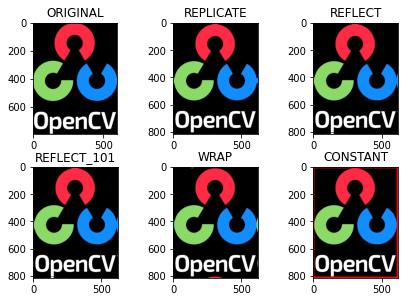

In [23]:
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img_scr = cv.imread('../images/logo.png')
img = cv.cvtColor(img_scr, cv.COLOR_BGR2RGB)
replicate = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.show()